# Лабораторна робота №6
## з дисципліни "Чисельні методи"

##### За темою: "Чисельне диференціювання та інтегрування функцій"

##### Виконав: студент групи КА-12 Гавлицький Іван

##### Перевірила: Димитрієва О. А.

##### *Мета роботи:* придбання практичних навичок в чисельному диференціюванні за допомогою інтерполяційних формул і різницевих схем, а також в чисельному інтегруванні за допомогою квадратурних і інтерполяційних формул. Практичне використання інтерполяційних формул для обчислення значень похідних функцій 1-го і 2-го порядків з заданою точністю. Оцінювання похибок чисельного диференціювання і інтегрування.

## Варіант 38

##### 1. Скласти таблиці скінченних різниць з регулярним кроком, використовуючи значення функцій таблиці. Визначити 1-у і 2-у похідні функції в утворених вузлах, використовуючи для цього несиметричні обернені, прямі чи симетричні різницеві схеми диференціювання, визначаючи доцільність застосування тієї чи іншої схеми розташуванням вузла функції. Визначити і оцінити як величини розбіжностей співвідносяться з порядком точності різницевої схеми.

##### 2. Для визначених в п.1 вузлів записати інтерполяційний поліном, знайти 1-у і 2-у похідні функції у вузлах інтерполяції. Порівняти отримані значення з точними.

##### 3. Для функцій, що задані в таблиці, побудувати графіки і переконатися в додатності функції на визначеному інтервалі, інакше перевизначити інтервали інтегрування або вид початкової функції таким чином, щоб функція була невід’ємною на обраному інтервалі інтегрування.

##### 4. Скласти програми чисельного інтегрування за наступними розрахунковими схемами:<br>1) метод лівих прямокутників<br>2) метод правих прямокутників<br>3) метод середніх прямокутників<br>4) метод трапецій<br>5) метод Сімпсона<br>6) метод Ньютона<br>7) метод Буля.

##### 5. Обрати крок інтегрування, що забезпечує точність отриманого результату на рівні 0.001.

##### 6. Визначити похибку отриманого результата за залишковим членом, за правилом Рунге і за допомогою екстраполяції Річардсона.

##### 7. Використовуючи рекурентний алгоритм, отримати декілька наближень для заданого інтеграла.

##### 8. Проаналізувати отримані результати за точністю, кількістю ітерацій, кількістю розрахункових точок.


<center> <img src=https://i.imgur.com/H2WS695.png> </center>

In [86]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math

In [87]:
def func(x):
    return 10 * x * sp.log(x, 10)
vec_func = np.vectorize(func)

a, b = 1, 1.5

x_smbl = sp.Symbol('x')
func_smbl = func(x_smbl)
func_smbl

10*x*log(x)/log(10)

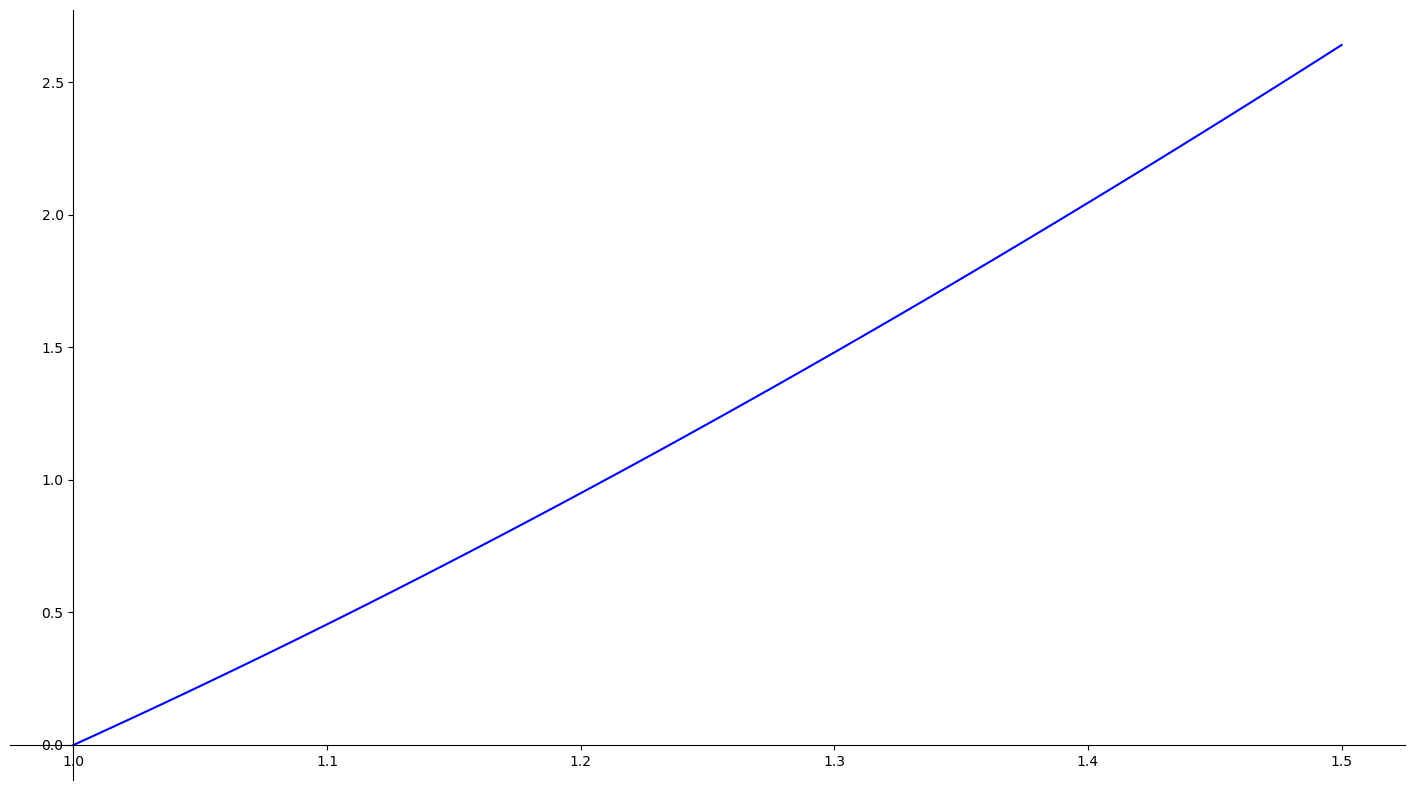

In [88]:
x_set = np.linspace(a, b, 100)

graph, ax = plt.subplots(1, 1, figsize = (18, 10))

plt.plot(x_set, vec_func(x_set), 'b')

ax.spines['left'].set_position(('data', 1))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

## Чисельне диференціювання

##### Обислимо еталон $f'(x)$ та $f''(x)$ для подальшої перевірки результатів

In [89]:
func_dx_smbl = sp.diff(func_smbl, x_smbl)
func_dx = sp.lambdify(x_smbl, func_dx_smbl)
vec_func_dx = np.vectorize(func_dx)

print('Перша похідна:')
func_dx_smbl

Перша похідна:


10*log(x)/log(10) + 10/log(10)

In [90]:
func_d2x_smbl = sp.diff(func_smbl, x_smbl, 2)
func_d2x = sp.lambdify(x_smbl, func_d2x_smbl)
vec_func_d2x = np.vectorize(func_d2x)

print('Друга похідна:')
func_d2x_smbl

Друга похідна:


10/(x*log(10))

##### Оберемо вузли на заданному проміжку із регулярним кроком $h = 0.1$

In [91]:
h = 0.1
n = math.ceil((b - a) / h)

x_nodes = np.linspace(a, b, n)
y_nodes = np.float32(vec_func(x_nodes))

##### Одержали наступні вузли та значення функції в них

In [92]:
np.array((x_nodes, y_nodes))

array([[1.        , 1.125     , 1.25      , 1.375     , 1.5       ],
       [0.        , 0.57546586, 1.21137512, 1.90166211, 2.64136887]])

### Різницеві схеми диференціювання

In [93]:
def fdf(y_set, h, diff=1, acc=1): # прямі 
    output = np.zeros_like(y_set)

    if diff == 1 and acc == 1:
        temp = y_set[1:] - y_set[:-1]
        output[:-1] = temp / h
    elif diff == 1 and acc == 2:
        temp = -y_set[2:] + 4*y_set[1:-1] - 3*y_set[:-2]
        output[:-2] = temp / (2*h)

    elif diff == 2 and acc == 1:
        temp = y_set[2:] - 2*y_set[1:-1] + y_set[:-2]
        output[:-2] = temp / h**2
    else:
        temp = -y_set[3:] + 4*y_set[2:-1] - 5*y_set[1:-2] + 2*y_set[:-3]
        output[:-3] = temp / h**2

    return output
    

def bdf(y_set, h, diff=1, acc=1): # зворотні
    output = np.zeros_like(y_set)

    if diff == 1 and acc == 1:
        temp = y_set[1:] - y_set[:-1]
        output[1:] = temp / h
    elif diff == 1 and acc == 2:
        temp = 3*y_set[2:] - 4*y_set[1:-1] + y_set[:-2]
        output[2:] = temp / (2*h)

    elif diff == 2 and acc == 1:
        temp = y_set[2:] - 2*y_set[1:-1] + y_set[:-2]
        output[2:] = temp / h**2
    else:
        temp = 2*y_set[3:] - 5*y_set[2:-1] + 4*y_set[1:-2] - y_set[:-3]
        output[3:] = temp / h**2

    return output


def cdf(y_set, h, diff=1, acc=1): # симетричні
    output = np.zeros_like(y_set)

    if diff == 1 and acc == 1:
        temp = y_set[2:] - y_set[:-2]
        output[1:-1] = temp / (2*h)
    elif diff == 1 and acc == 2:
        temp = -y_set[4:] + 8*y_set[3:-1] - 8*y_set[1:-3] + y_set[:-4]
        output[2:-2] = temp / (2*h)

    elif diff == 2 and acc == 1:
        temp = y_set[2:] - 2*y_set[1:-1] + y_set[:-2]
        output[1:-1] = temp / h**2
    else:
        temp = -y_set[4:] + 16*y_set[3:-1] -30*y_set[2:-2] + 16*y_set[1:-3] - y_set[:-4]
        output[2:-2] = temp / (12*h**2)

    return output

##### За цими схемами обчислимо похідні та визначимо розбіжніть із еталонним значенням

In [94]:
df_nodes = vec_func_dx(x_nodes)
d2f_nodes = vec_func_d2x(x_nodes)

def print_derivatives(title, diff_num_set, df_set):
    print(title)
    for ii in range(len(df_set)):
        if diff_num_set[ii] != 0:
            delta = abs((diff_num_set[ii] - df_set[ii])/df_set[ii])
            print(f"x_{ii}: {diff_num_set[ii]}, 𝛿 = {delta}")

In [95]:
diff_schs = [fdf, bdf, cdf]
diff_schs_name = ['FDF', 'BDF', 'CDF']


for sch, sch_name in zip(diff_schs, diff_schs_name):
    for diff_ii in range(1, 3):
        print(f'\n {diff_ii}-a похідна')

        for acc_ii in range(1, 3):
            title = f'{sch_name}({acc_ii}):'
            print_derivatives(title , sch(y_nodes, h, diff_ii, acc_ii), df_nodes)



 1-a похідна
FDF(1):
x_0: 5.7546586990356445, 𝛿 = 0.3250591335667986
x_1: 6.359092712402344, 𝛿 = 0.3099458139429039
x_2: 6.902869701385498, 𝛿 = 0.29947501715662744
x_3: 7.397067546844482, 𝛿 = 0.2918449137221077
FDF(2):
x_0: 5.452441692352295, 𝛿 = 0.2554710961229623
x_1: 6.0872039794921875, 𝛿 = 0.25393790155010765
x_2: 6.655771732330322, 𝛿 = 0.25295847382496156

 2-a похідна
FDF(1):
x_0: 6.044340133666992, 𝛿 = 0.39176074887672563
x_1: 5.437773704528809, 𝛿 = 0.12015805140310735
x_2: 4.941976070404053, 𝛿 = 0.06966599158217157
FDF(2):
x_0: 6.650900840759277, 𝛿 = 0.531426513091388
x_1: 5.933558940887451, 𝛿 = 0.22228768283874442

 1-a похідна
BDF(1):
x_1: 5.7546586990356445, 𝛿 = 0.185435000620401
x_2: 6.359092712402344, 𝛿 = 0.19710822730596075
x_3: 6.902869701385498, 𝛿 = 0.20553679648706094
x_4: 7.397067546844482, 𝛿 = 0.21186768472400472
BDF(2):
x_2: 6.661308765411377, 𝛿 = 0.25400082816008046
x_3: 7.174759864807129, 𝛿 = 0.2530204678856197
x_4: 7.644166469573975, 𝛿 = 0.25235010528993945

 2-

### Диференціювання інтерполяційного багаточлену

##### За визначеними вузлами знайдемо інтерполяційний багаточлен Лагранжа

In [96]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

pol = Polynomial(lagrange(x_nodes, y_nodes).coef[::-1])
pol_smbl = sp.expand(pol(x_smbl))
pol_smbl

0.189046223958485*x**4 - 1.41557312011855*x**3 + 5.27322451273903*x**2 - 2.71235179901305*x - 1.33434581756546

##### Обчислимо у вузлах $pol'(x)$ та  $pol''(x)$

In [97]:
pol_dx = sp.diff(pol_smbl, x_smbl)
print('Перша похідна:')
pol_dx

Перша похідна:


0.75618489583394*x**3 - 4.24671936035566*x**2 + 10.5464490254781*x - 2.71235179901305

In [98]:
pol_d2x = sp.diff(pol_smbl, x_smbl, 2)
print('Друга похідна:')
pol_d2x

Друга похідна:


2.26855468750182*x**2 - 8.49343872071131*x + 10.5464490254781

In [99]:
vec_pol_dx = np.vectorize(sp.lambdify(x_smbl, pol_dx))
vec_pol_d2x = np.vectorize(sp.lambdify(x_smbl, pol_d2x))

df_pol_nodes = vec_pol_dx(x_nodes)
d2f_pol_nodes = vec_pol_d2x(x_nodes)

##### Визначимо розбіжніть із еталонним значенням

In [100]:
print_derivatives('1-а похідна', df_pol_nodes, df_nodes)
print_derivatives('2-а похідна', d2f_pol_nodes, d2f_nodes)

1-а похідна
x_0: 4.343562761943332, 𝛿 = 0.00014228661347626012
x_1: 4.85432648658824, 𝛿 = 2.957210917016628e-05
x_2: 5.31213410695452, 𝛿 = 1.678409017481638e-05
x_3: 5.725847164790228, 𝛿 = 2.176676893326775e-05
x_4: 6.1043272018434145, 𝛿 = 7.696645294274606e-05
2-а похідна
x_0: 4.32156499226861, 𝛿 = 0.004922887039736876
x_1: 3.8624699910473677, 𝛿 = 0.0005374051462829237
x_2: 3.4742673238105564, 𝛿 = 2.5481389686827985e-05
x_3: 3.156956990558177, 𝛿 = 0.0004902104686421337
x_4: 2.9105389912902293, 𝛿 = 0.005264554088421362


##### Спостерігаємо незначні похибки

## Чисельне інтегрування

In [101]:
def num_integration(n3):
    def actual_decorator(method):
        def wrapper(vec_func, a, b, h):
            n = math.ceil((b - a) / h)
            if n3:
                n = math.ceil(n/3) * 3

            h = (b - a) / n #оновлюємо значення

            x_set = np.linspace(a, b, n)
            y_set = np.float32(vec_func(x_set))

            return method(y_set, h)
        return wrapper
    return actual_decorator

##### За допомогою вбудованної функції визначимо еталонне значення інтегралу

In [102]:
J_value = sp.integrate(func_smbl, (x_smbl, a, b)).evalf()
J_value

0.623856408428752

##### Визначимо способи обчислення та покращення похибок

In [103]:
def print_errs(method, k, vec_func, a, b, h):
    J_h1, n1 = method(vec_func, a, b, h)
    J_h2, n2 = method(vec_func, a, b, h/2)

    print('Похибка за залишковим членом:')
    print(f'n = {n1}; J = {J_h1}')
    print(f'R = {res(J_h1, J_value)}')
    print('--------------------\n')

    print('Похибка за правилом Рунге:')
    print(f'n = {n1}; J = {J_h1}')
    print(f'n = {n2}; J = {J_h2}')
    print(f'Δ = {runge_err(J_h1, h, J_h2, h/2, k)}')
    print('--------------------\n')

    print('Екстраполяція Річардсона:')
    J = J = richardson_extrap(J_h1, h, J_h2, h/2, k)
    print(f"J = {J}")
    print(f"𝛿 = {relative_err(J, J_value)}")
    

def res(J, J_value):
    return abs(J - J_value)


def relative_err(J, J_value):
    return abs((J - J_value) / J_value)


def runge_err(J_h1, h1, J_h2, h2, k): # h2<h1
    theta = 1 / ((h1/h2)**k - 1)
    return abs((J_h1 - J_h2) / theta)


def richardson_extrap(J_h1, h1, J_h2, h2, k): #h2<h1
    theta = 1 / ((h1/h2)**k - 1)
    return J_h2 + theta*(J_h2 - J_h1)
    

### Метод правих прямокутників $O(h)$<br>(ручний розрахунок)

In [104]:
@num_integration(n3=False)
def right_rectangles(y_set, h):
    J = np.sum(y_set[1:] * h)
    
    return J, y_set.size

##### Визначимо, з яким кроком необхідно вести розрахунки, щоб забезпечити точність $\varepsilon = 0.001$

In [105]:
eps = 0.001

##### Побудуємо графік $f'(x)$

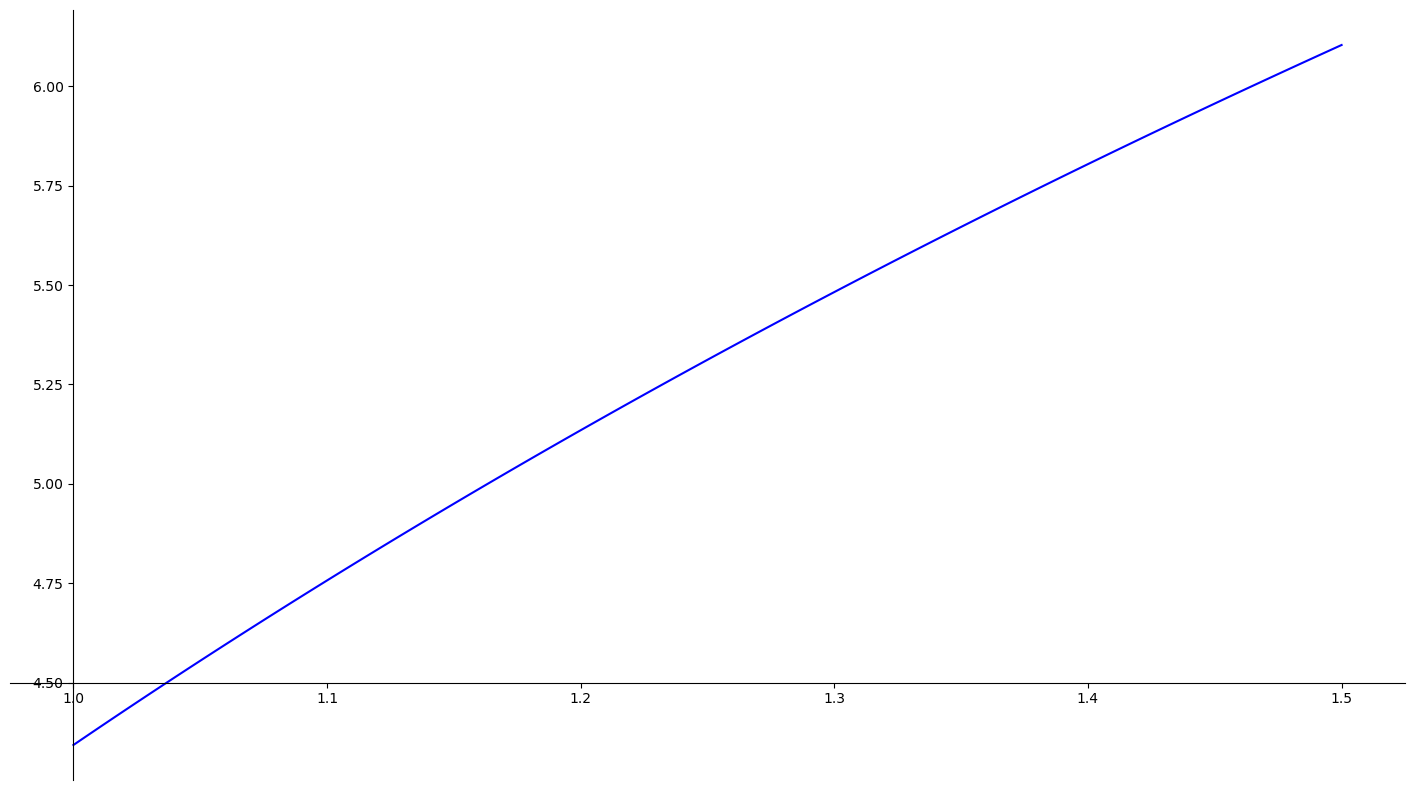

In [106]:
graph, ax = plt.subplots(1, 1, figsize = (18, 10))

plt.plot(x_set, vec_func_dx(x_set), 'b')

ax.spines['left'].set_position(('data', 1))
ax.spines['bottom'].set_position(('data', 4.5))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Максимум досягається в точці $x = 1.5$

In [107]:
M_1 = abs(func_dx(1.5))
M_1

6.10385740958933

In [108]:
h = 2*eps/(b-a)/M_1
n = int((b - a) / h)
print(f'h = {h}, n = {n}')

h = 0.0006553233032141099, n = 762


##### Спостерігаємо дуже грубу оцінку кроку
##### Визначити похибку отриманого результата за залишковим членом і за правилом Рунге, обчисливши значення із кроком $\frac{1}{2} h$. <br>Покращимо результат за допомогою екстраполяції Річардсона

In [109]:
print_errs(right_rectangles, 1, vec_func, a, b, h)

Похибка за залишковим членом:
n = 763; J = 0.6239043474197388
R = 0.0000479389909868733
--------------------

Похибка за правилом Рунге:
n = 763; J = 0.6239043474197388
n = 1526; J = 0.6238803267478943
Δ = 2.4020671844482422e-05
--------------------

Екстраполяція Річардсона:
J = 0.6238563060760498
𝛿 = 1.64064519829756E-7


##### Виконаємо декілька ітерацій послідовно зменшуючи крок вдвічі. Почнемо з $h = 0.1$. Поки не досягнемо відповідної похибки за залишковим членом.

In [110]:
h = 0.1
J, n = right_rectangles(vec_func, a, b, h)
print(f'n = {n}, J1 = {J}, R = {res(J, J_value)}')

h /= 2
J, n = right_rectangles(vec_func, a, b, h)
print(f'n = {n}, J1 = {J}, R = {res(J, J_value)}')

h /= 2
J, n = right_rectangles(vec_func, a, b, h)
print(f'n = {n}, J1 = {J}, R = {res(J, J_value)}')

h /= 2
J, n = right_rectangles(vec_func, a, b, h)
print(f'n = {n}, J1 = {J}, R = {res(J, J_value)}')

n = 5, J1 = 0.6329872012138367, R = 0.00913079278508477
n = 10, J1 = 0.6279125809669495, R = 0.00405617253819757
n = 20, J1 = 0.6257772445678711, R = 0.00192083613911920
n = 40, J1 = 0.6247920989990234, R = 0.000935690570271541


##### Знадобилося 4 ітерації. Порівняємо похибку за правилом Рунге з одержаною у попередньому випадку. <br>Покращимо результат за допомогою екстраполяції Річардсона

In [111]:
print_errs(right_rectangles, 1, vec_func, a, b, h)

Похибка за залишковим членом:
n = 40; J = 0.6247920989990234
R = 0.000935690570271541
--------------------

Похибка за правилом Рунге:
n = 40; J = 0.6247920989990234
n = 80; J = 0.6243182420730591
Δ = 0.00047385692596435547
--------------------

Екстраполяція Річардсона:
J = 0.6238443851470947
𝛿 = 0.0000192725144676346


##### Результат гірше, проте, з огляду на кількість кроків, не кричино.

### Метод трапецій $O(h^2)$

In [112]:
@num_integration(n3=False)
def trapezoid(y_set, h):
    J = h/2 * (y_set[0] + 2*np.sum(y_set[1:-1]) + y_set[-1])
    
    return J, y_set.size


##### Визначимо, з яким кроком необхідно вести розрахунки, щоб забезпечити точність $\varepsilon = 0.001$

In [113]:
eps = 0.001

##### Побудуємо графік $f''(x)$

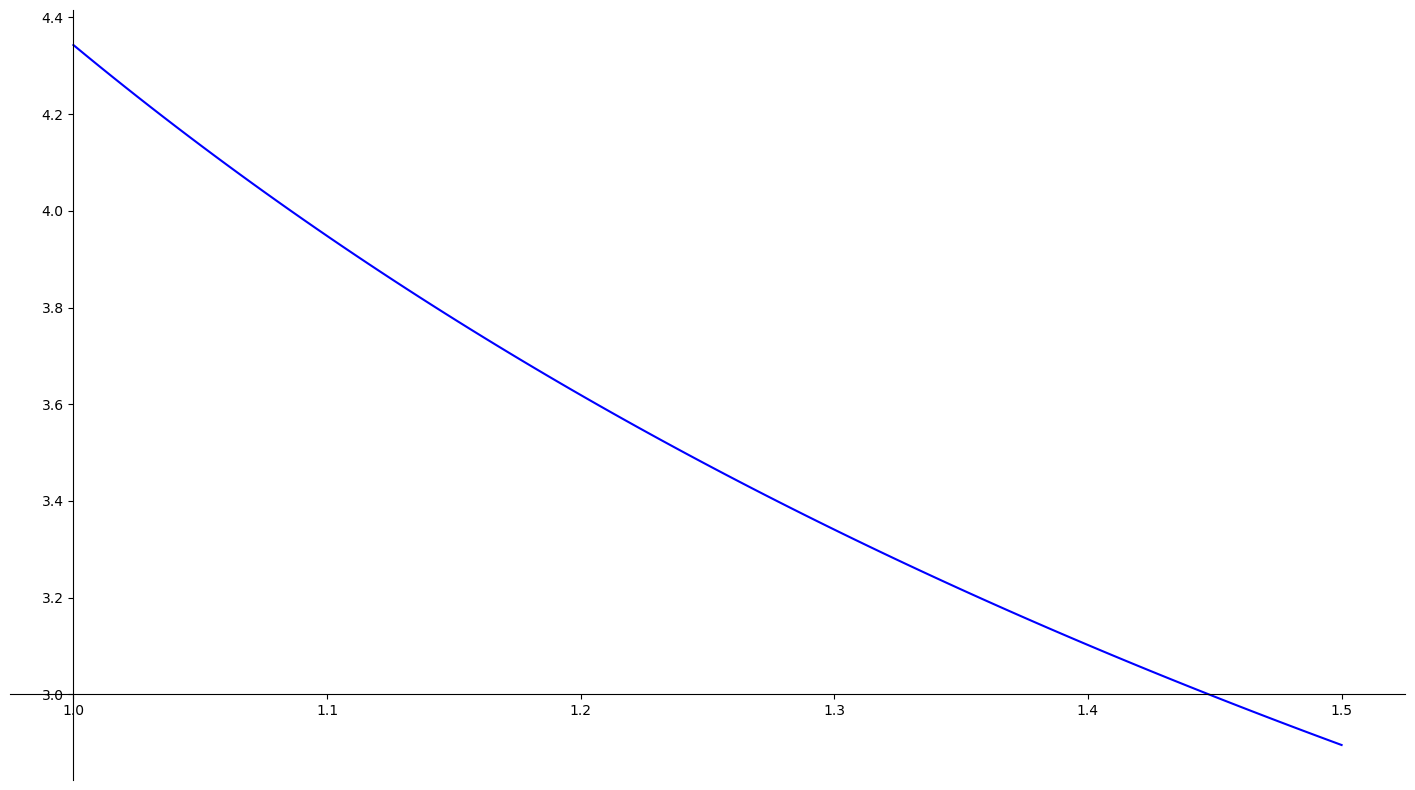

In [114]:
graph, ax = plt.subplots(1, 1, figsize = (18, 10))

plt.plot(x_set, vec_func_d2x(x_set), 'b')

ax.spines['left'].set_position(('data', 1))
ax.spines['bottom'].set_position(('data', 3))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Максимум досягається в точці $x = 1$

In [115]:
M_2 = abs(func_d2x(1))
M_2

4.3429448190325175

In [116]:
h = math.sqrt(12*eps/(b-a)/M_2)
h

0.07433844377699678

##### Бачимо, що оцінка кроку менш радикальна, порівняно з методом правих прямокутників.

##### Визначити похибку отриманого результата за залишковим членом і за правилом Рунге, обчисливши значення із кроком $\frac{1}{2} h$. <br>Покращимо результат за допомогою екстраполяції Річардсона

In [117]:
print_errs(trapezoid, 2, vec_func, a, b, h)

Похибка за залишковим членом:
n = 7; J = 0.5356073720114571
R = 0.0882490364172948
--------------------

Похибка за правилом Рунге:
n = 7; J = 0.5356073720114571
n = 14; J = 0.5794967583247593
Δ = 0.13166815893990658
--------------------

Екстраполяція Річардсона:
J = 0.5941265537625268
𝛿 = 0.0476549639701593


### Метод Ньютона $O(h^4)$

In [118]:
@num_integration(n3=True)
def newton(y_set, h):
    ii = [ii for ii in range(y_set.size) if ii%3 != 0]
    print(ii)
    J = 3/8*h*(y_set[0] + y_set[-1] + 2*np.sum(y_set[3:-1:3]) + 3*np.sum(y_set[ii]))
    
    return J, y_set.size


##### Визначимо, з яким кроком необхідно вести розрахунки, щоб забезпечити точність $\varepsilon = 0.001$

In [119]:
eps = 0.001

##### Обчислимо $f^{(4)}(x)$

In [120]:
func_d4x_smbl = sp.diff(func_smbl, x_smbl, 4)
func_d4x = sp.lambdify(x_smbl, func_d4x_smbl)
vec_func_d4x = np.vectorize(func_d4x)

func_d4x_smbl

20/(x**3*log(10))

##### Побудуємо графік

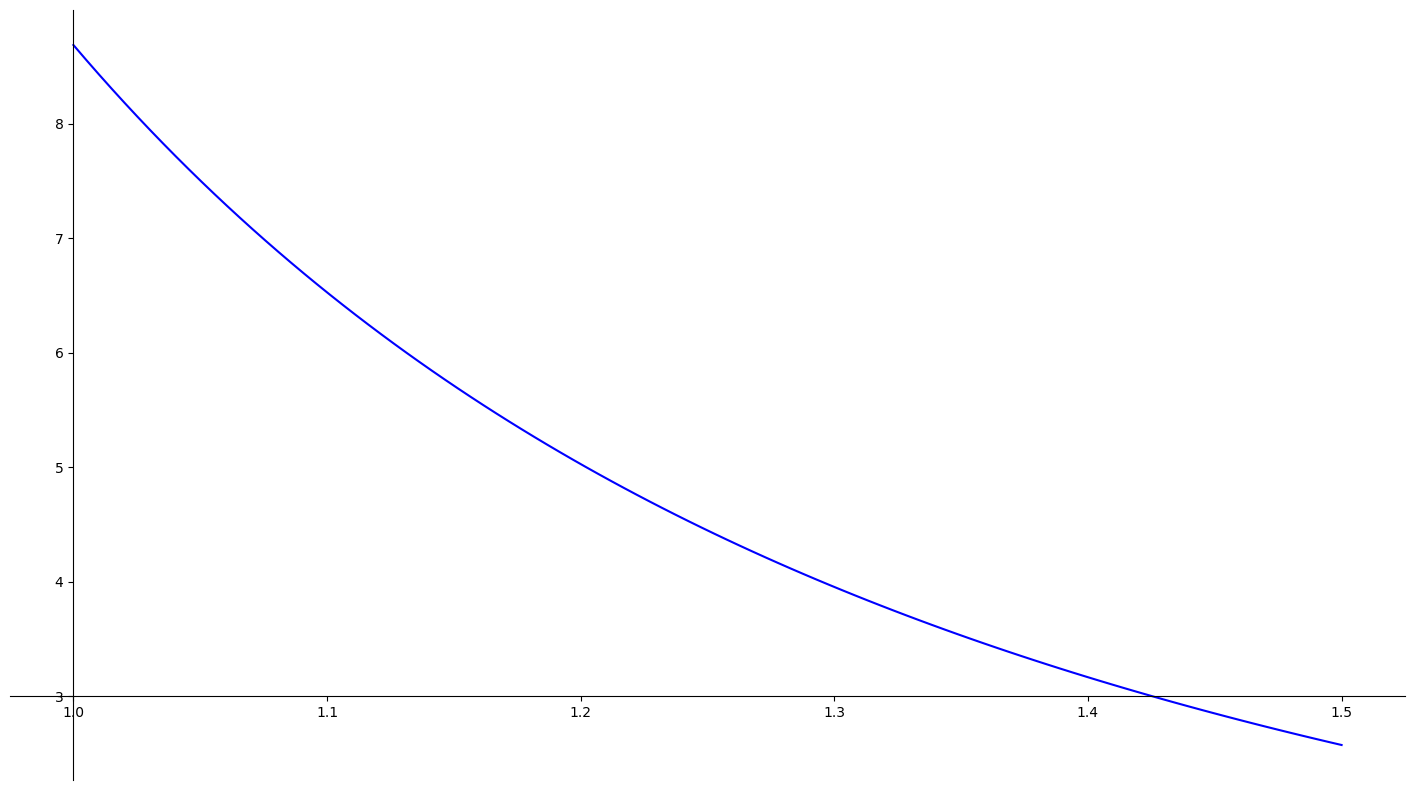

In [121]:
graph, ax = plt.subplots(1, 1, figsize = (18, 10))

plt.plot(x_set, vec_func_d4x(x_set), 'b')

ax.spines['left'].set_position(('data', 1))
ax.spines['bottom'].set_position(('data', 3))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### Максимум досягається в точці $x = 1$

In [122]:
M_4 = abs(func_d4x(1))
M_4

8.685889638065035

In [123]:
h = math.pow(80*eps/(b-a)/M_4, 1/4)
h

0.3684057660899219

##### Порівнюючи із попередніми методами, одержали доволі великий крок

##### Визначити похибку отриманого результата за залишковим членом і за правилом Рунге, обчисливши значення із кроком $\frac{1}{2} h$. <br>Покращимо результат за допомогою екстраполяції Річардсона

In [124]:
print_errs(newton, 4, vec_func, a, b, h/3)

[1, 2, 4, 5]
[1, 2, 4, 5, 7, 8]
Похибка за залишковим членом:
n = 6; J = 0.7463082671165466
R = 0.122451858687795
--------------------

Похибка за правилом Рунге:
n = 6; J = 0.7463082671165466
n = 9; J = 0.7039188742637634
Δ = 0.635840892791748
--------------------

Екстраполяція Річардсона:
J = 0.7010929147402446
𝛿 = 0.123804941758987


##### Спираючись на метод трапецій використаємо рекурентні формули трапецій та Сімпсона проведемо експерименти для деяких значень точності

In [125]:
def recurrent_trapezoid(vec_func, a, b, eps):
    n, delta = 1, 1
    J, _ = trapezoid(vec_func, a, b, b - a)

    while delta > eps:
        n = 2*n
        x_set = np.linspace(a, b, n)
        y_set = vec_func(x_set)

        J_pre = J
        J = 1/2*J + (b-a)/n * np.sum(y_set[1::2])

        delta = runge_err(J_pre, (b - a)/n, J, 2*(b - a)/n, 2)

    return float(J), int(math.log(n, 2)), float(delta)

##### $\varepsilon = 0.01$

In [126]:
J, n, eps = recurrent_trapezoid(vec_func, a, b, 0.01)
print(f'n = {n}; J = {J}')
print(f'\nПохибка за правилом Рунге: \nΔ = {eps}')

n = 7; J = 0.6423728536055762

Похибка за правилом Рунге: 
Δ = 0.009772540651267491


##### $\varepsilon = 0.001$

In [127]:
J, n, eps = recurrent_trapezoid(vec_func, a, b, 0.001)
print(f'n = {n}; J = {J}')
print(f'\nПохибка за правилом Рунге: \nΔ = {eps}')

n = 12; J = 0.6248609962491101

Похибка за правилом Рунге: 
Δ = 0.0006258170058413462


##### Спостерігаємо некритичне збільшення ітерацій. 
##### Проведемо відповідні експерименти для формули Сімпсона

In [128]:
def recurrent_simpson(vec_func, a, b, eps):
    n, delta = 1, 1
    T, _ = trapezoid(vec_func, a, b, b - a)
    S = 0

    while delta > eps:
        n = 2*n
        x_set = np.linspace(a, b, n)
        y_set = vec_func(x_set)

        T_pre = T
        T = 1/2*T + (b-a)/n * np.sum(y_set[1::2])

        S_pre = S
        S = 4/3*T - 1/3*T_pre

        delta = runge_err(S_pre, (b - a)/n, S, 2*(b - a)/n, 4)

    return float(S), int(math.log(n, 2)), float(delta)

##### $\varepsilon = 0.01$

In [129]:
J, n, eps = recurrent_simpson(vec_func, a, b, 0.01)
print(f'n = {n}; J = {J}')
print(f'\nПохибка за правилом Рунге: \nΔ = {eps}')

n = 7; J = 0.6380295022050129

Похибка за правилом Рунге: 
Δ = 0.0098852157479925


##### $\varepsilon = 0.001$

In [130]:
J, n, eps = recurrent_simpson(vec_func, a, b, 0.001)
print(f'n = {n}; J = {J}')
print(f'\nПохибка за правилом Рунге: \nΔ = {eps}')

n = 12; J = 0.624582855357625

Похибка за правилом Рунге: 
Δ = 0.0005747164884610012


##### Кількість ітерацій збігається з одержаною звичайним алгоритмом трапеціій.

## Висновок
##### Під час виконання роботи я придбав практичні навички в чисельному диференціюванні за допомогою інтерполяційних формул і різницевих схем, а також в чисельному інтегруванні за допомогою квадратурних і інтерполяційних формул. Практичному використанні інтерполяційних формул для обчислення значень похідних функцій 1-го і 2-го порядків з заданою точністю. Оцінюванні похибок чисельного диференціювання і інтегрування.